In [36]:
import pickle
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


with open("seg-docs", "rb") as fp:
   tokenized_text = pickle.load(fp)

# LLM extracted docs

example_df = pd.read_csv("climate.csv")

example_df["extraction"] = example_df["extraction"].apply(ast.literal_eval) # bodge to deal with csv storage
example_df["full_text"] = example_df['post_title'] + "\n\n" + example_df['self_text']

docs = example_df["extraction"].to_list()
docs = [d for ds in docs for d in ds]  # flatten

In [37]:
len_seg = pd.Series(tokenized_text).apply(len)
len_llm = pd.Series(docs).apply(len)

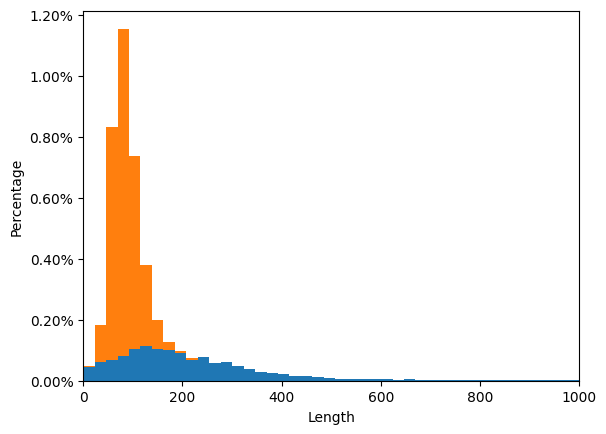

In [45]:
from matplotlib.ticker import PercentFormatter

plt.hist([len_seg, len_llm], 200, density=True, stacked=True)
plt.xlim(0,1000)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Length")
plt.ylabel("Percentage")
plt.savefig("figures/text-length.png")

plt.show() # blue is seg, orange is llm
